## Notebook imports and Packages

In [29]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Example 1 - A simple cost function

$f(x) = x^2 + x + 1$

In [6]:
def f(x):
    return x ** 2 + x + 1

In [7]:
print(f(5))

31


In [8]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

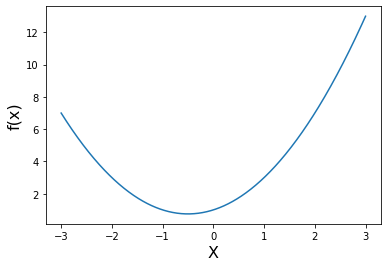

In [9]:
#Plot

# plt.xlim(-3, 3)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives
The slope of the curve at a given point

### Power Rule in Derivatives

$df(x^n) = n.x^n-1 $


In [10]:
def df(x):
    return 2 * x + 1

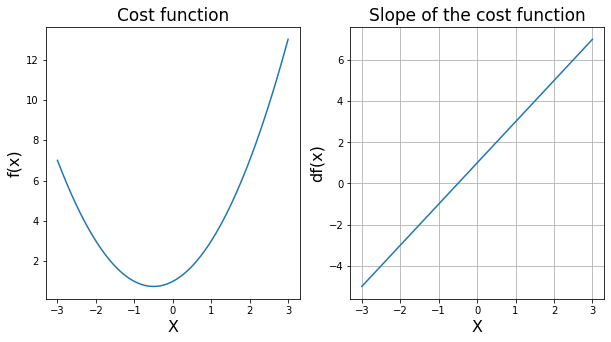

In [11]:
# Plot  function and derivative side by side

plt.figure(figsize=[10, 5])

# First chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1))

# Second chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_1, df(x_1))
plt.grid()
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.show()

## Gradient Descent

In [12]:
# Gradient Descent
new_x = 3
previous_x = 0
precision = 0.00000001

step_multiplier = 0.1

x_list = [new_x]
slope_list = [df(new_x)]

count = 0
while True:
    # new_x as a starting point at a random guess 
    previous_x = new_x
    
    # Slope of the graph
    gradient  = df(previous_x)
    
    # Update new_x value
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    
    count += 1
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        break

print(f"Iterated {count} times")

print("Local minimum occurs at: ", new_x)
print(f'Slope or df(x) value at this point is: {df(new_x)}')
print(f'f(x) value or cost at this point is: {f(new_x)}')

Iterated 82 times
Local minimum occurs at:  -0.49999996042262573
Slope or df(x) value at this point is: 7.915474853348314e-08
f(x) value or cost at this point is: 0.7500000000000016


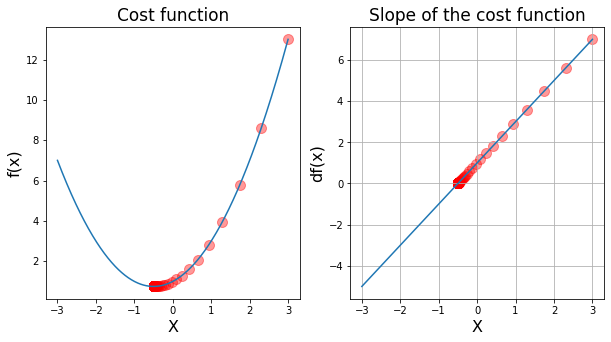

In [13]:
# Superimpose the gradient descent calculations
plt.figure(figsize=[10, 5])

# First chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1, f(x_1))

# The list to become a Numpy array and then use it in the f(x) function
values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=0.4)

# Second chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_1, df(x_1))
plt.grid()
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.scatter(x_list, slope_list, color="red", s=100, alpha=0.4)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [68]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# The g(x) function
def g(x):
    return (x**4) - (4 * (x**2)) + 5


def dg(x):
    return (4 * (x**3)) - (8 * x)

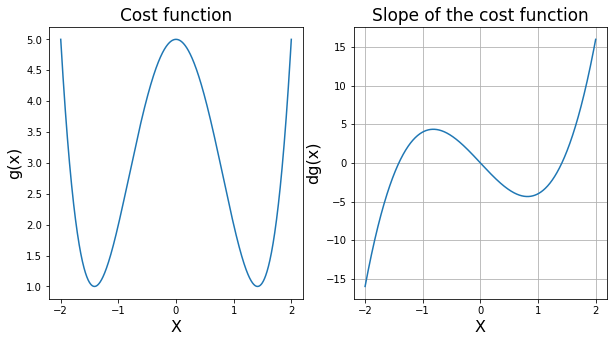

In [69]:
# Plot  function and derivative side by side

plt.figure(figsize=[10, 5])

# First chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)
plt.plot(x_2, g(x_2))

# Second chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2))
plt.grid()
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.show()


## Gradient Descent as a Python Function

In [70]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# The g(x) function
def g(x):
    return x**4 - 4 * x**2+ 5


def dg(x):
    return 4 * x**3 - 8 * x


def gradient_descent(derivative_func, initial_guess, multiplier, precision):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    while True:
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x  - previous_x)       
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            return new_x, x_list, slope_list

    

In [78]:
local_min, list_x, deriv_list = gradient_descent(dg, 2, 0.02, 0.0001)

In [79]:
print(local_min)
print(len(list_x))

1.4143888461883538
20


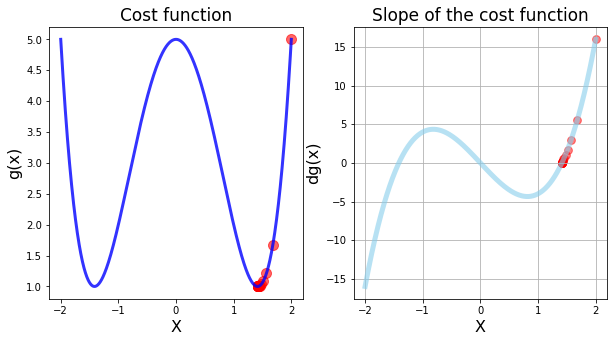

In [80]:
# Calling gradient descent function
# Plot  function and derivative side by side

plt.figure(figsize=[10, 5])

# First chart: Cost function
plt.subplot(1, 2, 1)

plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x_2, g(x_2), color='blue', alpha=0.8, linewidth=3)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Second chart: Derivative
plt.subplot(1, 2, 2)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=60, alpha=0.5)

plt.grid()
plt.title("Slope of the cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.show()

# Example 3 - Divergence, Overflow 
## $$h(x) = x^5 + 2x^4 + 2$$